### Tensorflow分类任务:

读取Mnist数据集
- 会自动进行下载

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


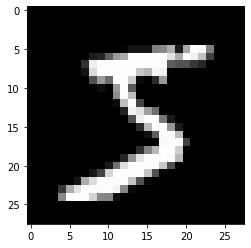

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

In [5]:
y_train[0]

5

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

In [7]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

选择损失和评估函数时候需要选择合适的,Api参考：https://tensorflow.google.cn/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy?version=stable

一定选择合适的损失函数

In [ ]:
# tf.losses.CategoricalCrossentropy

In [10]:
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
#              loss=tf.losses.CategoricalCrossentropy(),
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [11]:
# model.fit(x_train, y_train, epochs=5, batch_size=64,
#           validation_data=(x_valid, y_valid))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_valid, y_valid))

Epoch 1/5
782/782 [==============================] - 4s 4ms/step - loss: 0.4811 - sparse_categorical_accuracy: 0.8488 - val_loss: 0.1467 - val_sparse_categorical_accuracy: 0.9573
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.1488 - sparse_categorical_accuracy: 0.9553 - val_loss: 0.1454 - val_sparse_categorical_accuracy: 0.9562
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.1229 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.1281 - val_sparse_categorical_accuracy: 0.9621
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.1240 - val_sparse_categorical_accuracy: 0.9641
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.0924 - sparse_categorical_accuracy: 0.9719 - val_loss: 0.1393 - val_sparse_categorical_accuracy: 0.9634


### tf.data模块常用函数

In [12]:
import numpy as np
input_data = np.arange(16)
input_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [13]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)


#### repeat操作

In [14]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(

#### batch操作

In [15]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2).batch(4)
for data in dataset:
    print (data)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int64)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int64)


#### shuffle操作

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(input_data).shuffle(buffer_size=10).batch(4)
for data in dataset:
    print (data)

tf.Tensor([ 3  1  4 11], shape=(4,), dtype=int64)
tf.Tensor([12  9 10  7], shape=(4,), dtype=int64)
tf.Tensor([ 0  5 13  6], shape=(4,), dtype=int64)
tf.Tensor([ 2 15 14  8], shape=(4,), dtype=int64)


#### 重新训练

In [17]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train = train.batch(32)
train = train.repeat()

valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
valid = valid.batch(32)
valid = valid.repeat()

model.fit(train, epochs=5,steps_per_epoch=100, validation_data=valid,validation_steps=100)

Epoch 1/5
100/100 [==============================] - 1s 5ms/step - loss: 0.1157 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.2341 - val_sparse_categorical_accuracy: 0.9378
Epoch 2/5
100/100 [==============================] - 0s 4ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.2475 - val_sparse_categorical_accuracy: 0.9347
Epoch 3/5
100/100 [==============================] - 0s 4ms/step - loss: 0.1868 - sparse_categorical_accuracy: 0.9456 - val_loss: 0.2174 - val_sparse_categorical_accuracy: 0.9356
Epoch 4/5
100/100 [==============================] - 1s 5ms/step - loss: 0.1539 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.1924 - val_sparse_categorical_accuracy: 0.9463
Epoch 5/5
100/100 [==============================] - 0s 5ms/step - loss: 0.1738 - sparse_categorical_accuracy: 0.9447 - val_loss: 0.2298 - val_sparse_categorical_accuracy: 0.9347


### 练手的fashion数据集

In [18]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step: 


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
test_images.shape

(10000, 28, 28)

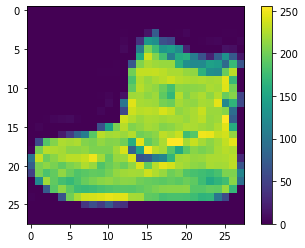

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

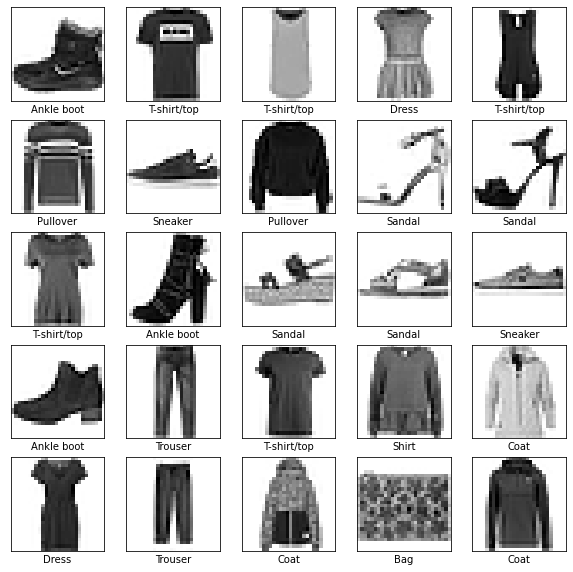

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6225 - accuracy: 0.7837
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3863 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3457 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3168 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2562 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2453 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

### 评估操作

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3385 - accuracy: 0.8840

Test accuracy: 0.8840000033378601


In [30]:
predictions = model.predict(test_images)

In [31]:
predictions.shape

(10000, 10)

In [32]:
predictions[0]

array([1.7037169e-06, 7.7226026e-08, 8.9423759e-07, 9.7620791e-08,
       1.8650848e-06, 2.7168947e-03, 5.2205528e-06, 3.1112760e-02,
       1.4009103e-04, 9.6602041e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

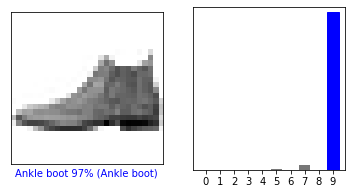

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

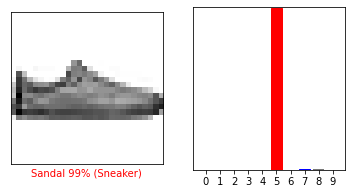

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### 保存训练好的模型

保存权重参数与网络模型

In [37]:
model.save('fashion_model.h5')

网络架构

In [38]:
config = model.to_json()
config

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_input"}}, {"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"cl

In [39]:
with open('config.json', 'w') as json:
    json.write(config)

In [41]:
model = keras.models.model_from_json(config)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


权重参数

In [42]:
weights = model.get_weights()
weights

[array([[ 0.07288413, -0.02121742,  0.00597343, ..., -0.05134402,
         -0.06881219,  0.02083044],
        [-0.04476352,  0.05249283,  0.04468847, ..., -0.04818652,
          0.01400824,  0.05313889],
        [-0.04042834, -0.06949237,  0.07187886, ...,  0.07197127,
         -0.0375871 , -0.06924227],
        ...,
        [-0.04650509,  0.03088   ,  0.03810525, ...,  0.07522405,
         -0.01836234,  0.01027828],
        [-0.05877223, -0.00342155,  0.00413404, ...,  0.05564123,
          0.01486875,  0.0581123 ],
        [ 0.02133863,  0.05168822, -0.04907962, ..., -0.02320151,
         -0.06415446, -0.04053319]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [43]:
model.save_weights('weights.h5')

In [44]:
model.load_weights('weights.h5')